In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


* [Документация в sklearn](http://scikit-learn.org/stable/modules/clustering.html)
* [Обзор алгоритмов кластеризации данных](https://habrahabr.ru/post/101338/)

Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.

# Кластеризация и снижение размерности

Основное отличие методов обучения без учителя от привычных классификаций и регрессий машинного обучения в том, что разметки для данных в этом случае нет. От этого образуются сразу несколько особенностей — во-первых это возможность использования несопоставимо больших объёмов данных, поскольку их не нужно будет размечать руками для обучения, а во-вторых это неясность измерения качества методов, из-за отсутствия таких же прямолинейных и интуитивно понятных метрик, как в задачах обучения с учителем.

Одной из самых очевидных задач, которые возникают в голове в отсутствие явной разметки, является задача снижения размерности данных. С одной стороны её можно рассматривать как помощь в визуализации данных, c другой стороны подобное снижение размерности может убрать лишние сильно скоррелированные признаки у наблюдений и подготовить данные для дальнейшей обработки в режиме обучения с учителем, например сделать входные данные более "перевариваемыми" для деревьев решений.


# t-SNE

* [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
* [Препарируем t-SNE](https://habrahabr.ru/post/267041/)
* [Подглядывание в n-мерное пространство с t-SNE // Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habrahabr.ru/company/ods/blog/323210/#podglyadyvanie-v-n-mernoe-prostranstvo-s-t-sne)
* [Алгоритм t-SNE. Иллюстрированный вводный курс](http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/)
* [Алгоритм Джонкера-Волгенанта + t-SNE = супер-сила](https://habrahabr.ru/company/wunderfund/blog/326750/)
* http://www.levvu.narod.ru/Machine_Learning_LTU_11.pdf

t-SNE — техника нелинейного снижения размерности и визуализации многомерных переменных. Этот алгоритм может свернуть сотни измерений к всего двум, сохраняя при этом важные отношения между данными: чем ближе объекты располагаются в исходном пространстве, тем меньше расстояние между этими объектами в пространстве сокращенной размерности. t-SNE неплохо работает на маленьких и средних реальных наборах данных и не требует большого количества настроек гиперпараметров. Другими словами, если взять 100 000 точек и пропустить их через эту волшебный черный ящик, на выходе мы получим красивый график рассеяния.

Алгоритм t-SNE, который также относят к методам множественного обучения признаков, был [опубликован в 2008 году](http://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) голландским исследователем Лоуренсом ван дер Маатеном (сейчас работает в Facebook AI Research) и Джеффри Хинтоном. Классический SNE был предложен [Хинтоном и Ровейсом в 2002](http://www.cs.toronto.edu/~fritz/absps/sne.pdf). В статье 2008 года описывается несколько «трюков», которые позволили упростить процесс поиска глобальных минимумов, и повысить качество визуализации.

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
iris_full = X[:]

In [5]:
iris_full = np.column_stack([iris_full, y])

In [6]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_full)

In [7]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(iris_scaled)

<Figure size 864x864 with 0 Axes>

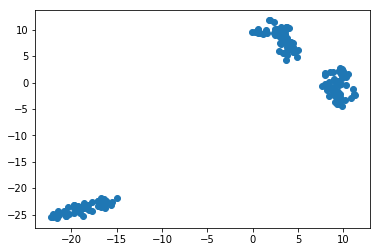

<Figure size 864x864 with 0 Axes>

In [8]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

In [9]:
iris_full_df = pd.DataFrame(iris_full)

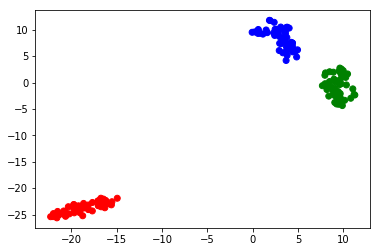

In [10]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=iris_full_df[4].map({
        0: 'red',
        1: 'green',
        2: "blue"
    }))

# Метод главных компонент (PCA)

* [Открытый курс машинного обучения. Тема 7. Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
* [Как работает метод главных компонент (PCA) на простом примере](https://habrahabr.ru/post/304214/)

Метод главных компонент (Principal Component Analysis) — один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.

В анализе данных, как и в любом другом анализе, порой бывает нелишним создать упрощенную модель, максимально точно описывающую реальное положение дел. Часто бывает так, что признаки довольно сильно зависят друг от друга и их одновременное наличие избыточно. 

Зная зависимости между признаками, мы можем выразить несколько признаков через один, слить воедино, так сказать, и работать уже с более простой моделью. Конечно, избежать потерь информации, скорее всего не удастся, но минимизировать ее нам поможет как раз метод PCA.

Выражаясь более строго, данный метод аппроксимирует n-размерное облако наблюдений до эллипсоида (тоже n-мерного), полуоси которого и будут являться будущими главными компонентами. И при проекции на такие оси (снижении размерности) сохраняется наибольшее количество информации.

То есть допустим, у нас имеются два признака, сильно коррелирующие друг с другом. С помощью алгоритма PCA мы сможем легко найти признак-комбинацию и, ценой части информации, выразить оба этих признака одним новым.

![](images/pca.gif)

Теперь посмотрим, насколько PCA улучшит результаты для модели, которая в данном случае плохо справится с классификацией из-за того, что у неё не хватит сложности для описания данных:

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


Теперь попробуем сделать то же самое, но с данными, для которых мы снизили размерность до 2D:

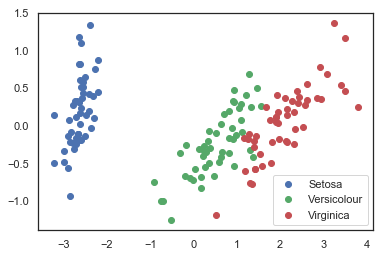

In [13]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [14]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


Видно, что качество возросло незначительно, но для более сложных данных более высокой размерности, где данные не разбиваются тривиально вдоль одного признака, применение PCA может достаточно сильно улучшить качество работы деревьев решений и ансамблей на их основе.

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461621, 0.97763178])

Теперь посмотрим, насколько PCA улучшит результаты для модели, которая в данном случае плохо справится с классификацией из-за того, что у неё не хватит сложности для описания данных:

In [134]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

Параметр n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы хотим снизить наш датасет. Другими словами – это n айгенвекторов с самыми большими собственными числами.

In [147]:
X_pca.shape

(891, 5)

In [154]:
X_pca[y == 0, 0]

array([ -8.61395007e-01,  -1.26188106e+00,  -1.24302793e+00,
         4.95049549e-02,   6.86276324e-01,  -1.20642606e+00,
         2.33592146e+00,  -3.47940562e-01,   1.12966598e+00,
         6.10057952e-02,  -6.16231128e-01,   1.50025734e+00,
        -1.25630401e+00,   4.80985863e+00,  -1.24640828e+00,
        -1.72301240e-01,  -9.06767879e-01,   8.39241782e-01,
         4.53101956e-01,  -1.21289399e+00,   4.67802140e-01,
        -7.01741980e-02,   5.54319819e-01,  -1.25056528e+00,
        -1.24642631e+00,  -8.08854589e-01,  -3.77313959e-01,
         1.04226325e-01,   1.23039778e+00,  -1.21719919e+00,
         7.11949133e-01,  -1.25511885e+00,   2.25389502e+00,
        -1.23103771e+00,   7.89649818e-01,   1.34771129e+00,
        -1.37312431e-01,  -1.20743306e+00,  -5.08008962e-01,
        -7.83117319e-01,   3.07217353e+00,  -3.99883149e-02,
        -8.06802645e-01,  -1.23649477e+00,  -1.25150883e+00,
        -1.24989902e+00,  -1.21072898e+00,   8.57045308e-02,
         1.25097174e+00,

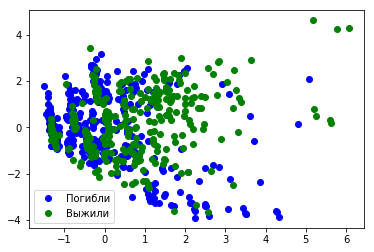

In [128]:
# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label="Погибли")
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label="Выжили")
plt.legend(loc=0);

In [129]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.77239


Видно, что качество возросло незначительно, но для более сложных данных более высокой размерности, где данные не разбиваются тривиально вдоль одного признака, применение PCA может достаточно сильно улучшить качество работы деревьев решений и ансамблей на их основе.

На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных.

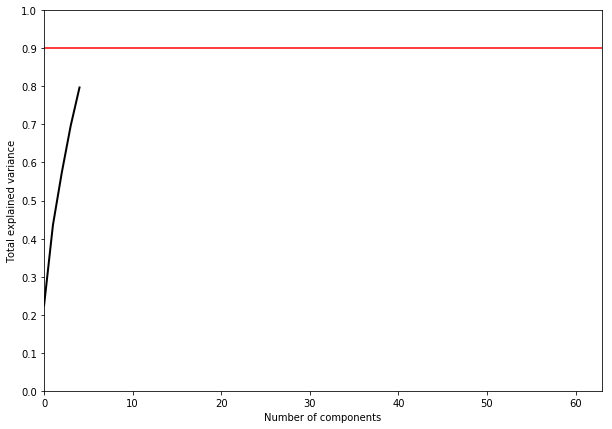

In [183]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show();

In [184]:
pca.explained_variance_ratio_

array([ 0.22465184,  0.21086097,  0.13785684,  0.12255005,  0.10119398])

In [185]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.22465184,  0.43551281,  0.57336965,  0.6959197 ,  0.79711367])

# Кластеризация

Интуитивная постановка задачи кластеризации довольно проста и представляет из себя наше желание сказать: "Вот тут у меня насыпаны точки. Я вижу, что они сваливаются в какие-то кучки вместе. Было бы круто иметь возможность эти точки относить к кучкам и в случае появления новой точки на плоскости говорить, в какую кучку она падает." Из такой постановки видно, что пространства для фантазии получается много, и от этого возникает соответствующее множество алгоритмов решения этой задачи. Перечисленные алгоритмы ни в коем случае не описывают данное множество полностью, но являются примерами самых популярных методов решения задачи кластеризации.
<img src="images/clustering_comparison.png">

## Виды алгоритмов кластеризации
* Иерархические и плоские.
* * Иерархические алгоритмы (также называемые алгоритмами таксономии) строят не одно разбиение выборки на непересекающиеся кластеры, а систему вложенных разбиений. Т.о. на выходе мы получаем дерево кластеров, корнем которого является вся выборка, а листьями — наиболее мелкие кластера.
* * Плоские алгоритмы строят одно разбиение объектов на кластеры.
* Четкие и нечеткие.
* * Четкие (или непересекающиеся) алгоритмы каждому объекту выборки ставят в соответствие номер кластера, т.е. каждый объект принадлежит только одному кластеру.
* * Нечеткие (или пересекающиеся) алгоритмы каждому объекту ставят в соответствие набор вещественных значений, показывающих степень отношения объекта к кластерам. Т.е. каждый объект относится к каждому кластеру с некоторой вероятностью.


Про меры качества и примеры из использования можно почитать в [статье Сергея Королева](https://habrahabr.ru/company/ods/blog/325654/).

## K-means

Алгоритм К-средних, наверное, самый популярный и простой алгоритм кластеризации и очень легко представляется в виде простого псевдокода:

1. Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).


В случае обычной евклидовой метрики для точек лежащих на плоскости, этот алгоритм очень просто расписывается аналитически и рисуется. Давайте посмотрим соответствующий пример:

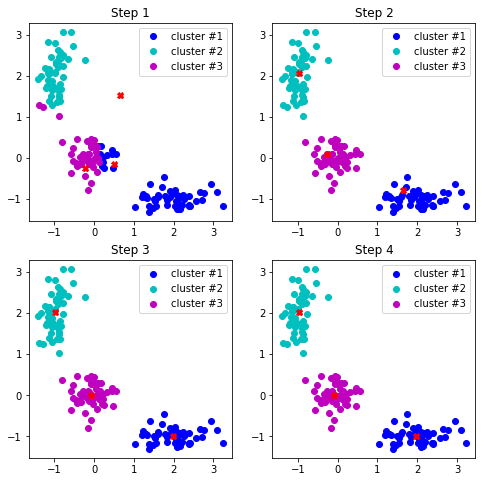

In [137]:
# Код взят из https://habrahabr.ru/company/ods/blog/325654/
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)
    
    
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Также стоит заметить, что хоть мы и рассматривали евклидово расстояние, алгоритм будет сходиться и в случае любой другой метрики, поэтому для различных задач кластеризации в зависимости от данных можно экспериментировать не только с количеством шагов или критерием сходимости, но и с метрикой, по которой мы считаем расстояния между точками и центроидами кластеров.

Другой особенностью этого алгоритма является то, что он чувствителен к исходному положению центроид кластеров в пространстве. В такой ситуации спасает несколько последовательных запусков алгоритма с последующим усреднением полученных кластеров.

### Выбор числа кластеров в k-means
В отличие от задачи классификации или регресии, в случае кластеризации сложнее выбрать критерий, с помощью которого было бы просто представить задачу кластеризации как задачу оптимизации.

В случае kMeans распространен вот такой критерий – сумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

Понятно, что здравый смысл в этом есть: мы хотим, чтобы точки располагались кучно возле центров своих кластеров. Но вот незадача: минимум такого функционала будет достигаться тогда, когда кластеров столько же, сколько и точек (то есть каждая точка – это кластер из одного элемента).

Для решения этого вопроса (выбора числа кластеров) часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого описанный функционал падает "уже не так быстро".

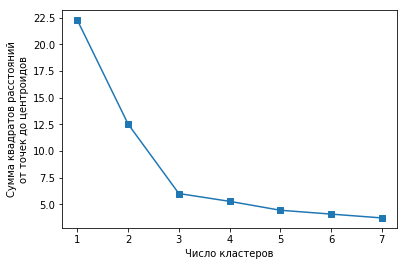

In [141]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel("Число кластеров")
plt.ylabel("Cумма квадратов расстояний\nот точек до центроидов");

Видим, что cумма квадратов расстояний от точек до центроидов падает сильно при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так сильно – при изменении числа кластеров с 3 до 4. Значит, в данной задаче оптимально задать 3 кластера.

### Сложности
Само по себе решение задачи K-means NP-трудное (NP-hard), и для размерности $d$, числа кластеров $k$ и числа точек $n$ решается за $O(n^{d k+1})$. Для решения такой боли часто используются эвристики, например MiniBatch K-means, который для обучения использует не весь датасет целиком, а лишь маленькие его порции (batch) и обновляет центроиды используя среднее за всю историю обновлений центроида от всех относящихся к нему точек. Сравнение обычного K-means и его MiniBatch имплементации можно посмотреть в [документации scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

[Реализация алгоритма в scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) обладает массой удобных плюшек, таких как возможность задать количество запусков через параметр `n_init`, что даст более устойчивые центроиды для кластеров в случае скошенных данных. К тому же эти запуски можно делать параллельно, не жертвуя временем вычисления.

## c-means

Как k-means, только нечёткая кластеризация. Нет в sklearn, но есть специальные пакеты.

## Иерархическая кластеризация
* [SciPy Hierarchical Clustering and Dendrogram Tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

Описанные выше методы кластеризации находят «плоскую» структуру кластеров. В некоторых задачах возникает потребность в построении иерархии кластеров, в которой верхним уровнем является один большой кластер, а нижним — ℓ кластеров, каждый из которых состоит из одного объекта. Например, при кластеризации новостей можно рассчитывать, что чем ниже мы спускаемся по иерархии, тем более тонкие различия между сюжетами будут выделяться.

Одним из подходов является восходящая кластеризация. Она начинается с нижнего уровня, на котором все объекты принадлежат к отдельным кластерам

Наверное самый простой и понятный алгоритм кластеризации без фиксированного числа кластеров — агломеративная кластеризация. Интуиция у алгоритма очень простая:

1. Начинаем с того, что высыпаем на каждую точку свой кластер
2. Сортируем попарные расстояния между центрами кластеров по возрастанию
3. Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера
4. Повторяем п. 2 и 3 до тех пор, пока все данные не склеятся в один кластер

По итогам выполнения такого алгоритма можно также построить замечательное дерево склеивания кластеров и глядя на него определить, на каком этапе нам было бы оптимальнее всего остановить алгоритм. Либо воспользоваться тем же правилом локтя, что и в k-means.

К счастью для нас в питоне уже есть замечательные инструменты для построения таких дендрограмм для агломеративной кластеризации. Рассмотрим на примере наших кластеров из K-means:

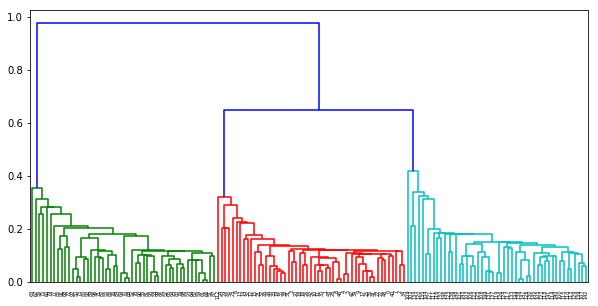

In [138]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Автоматическое определение числа кластеров

[Determining_the_number_of_clusters_in_a_data_set](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

# Самостоятельная работа
Примените изученные методы к набор данных о погибших на Титанике и проинтерпретируйте результаты.

0. Загрузите данные. преобразуйте строковые переменные в числовые. Заполните пропущенные значения в колонке `Age` средними значениями возраста. Поля `Name`, `Ticket`, `Cabin` можно исключить из анализа.
1. Визуализируйте двумерное пространство признаков с помощью t-SNA. Раскрасьте точки в этом пространстве в зависимости от пола, класса каюты и факта выживания пассажира. Какой вывод можно сделать из этой визуализации.
2. Снизьте размерность данных при помощи PCA. Проверьте, как укрупнение размерности влияет на качество классификации того, выжил пассажир или нет.
3. Сколько кластеров пассажиров следует выбрать при применении алгоритма k-means?
4. Примените иерархическую кластеризацию к данным.
5. Посчитайте метрики качества кластеризации и определите, какой метод в данном случае работает лучше.

In [155]:
titanic = pd.read_csv(
    "https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv")

In [156]:
titanic.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [157]:
for c in titanic.select_dtypes(include=[object]).columns:
    titanic[c] = pd.factorize(titanic[c])[0]

In [158]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, axis=1)
titanic["Age"] = imp.fit_transform(titanic["Age"].values.reshape(1, -1))[0]

In [159]:
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic)

In [160]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(titanic_scaled)

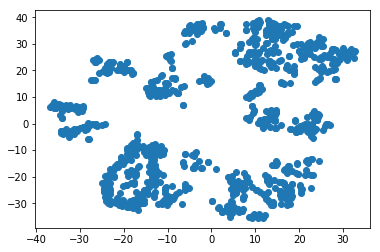

In [161]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

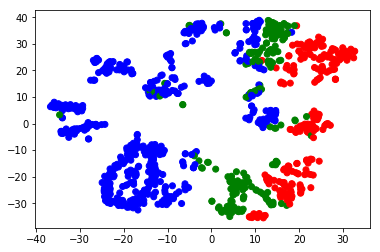

In [162]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=titanic["Pclass"].map({
        1: 'red',
        2: 'green',
        3: "blue"
    }))

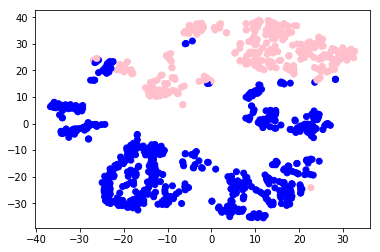

In [163]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=titanic["Sex"].map({
        0: "blue",
        1: "pink"
    }))

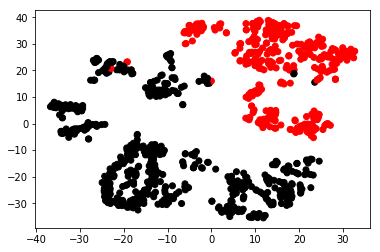

In [164]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=titanic["Survived"].map({
        0: "black",
        1: "red"
    }))

# PCA

In [ ]:
from sklearn import decomposition

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [165]:
X = np.delete(titanic_scaled, 1, axis=1)
y = titanic.iloc[:, 1].values

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, stratify=y, random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.76866


In [166]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

In [167]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.77239


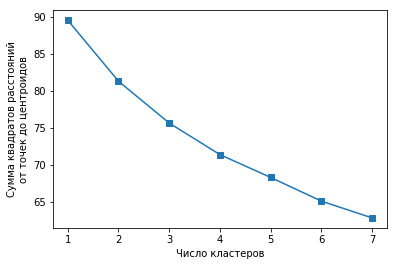

In [168]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(titanic_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel("Число кластеров")
plt.ylabel("Cумма квадратов расстояний\nот точек до центроидов");

In [169]:
X[labels == 0, :]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 891 but corresponding boolean dimension is 150

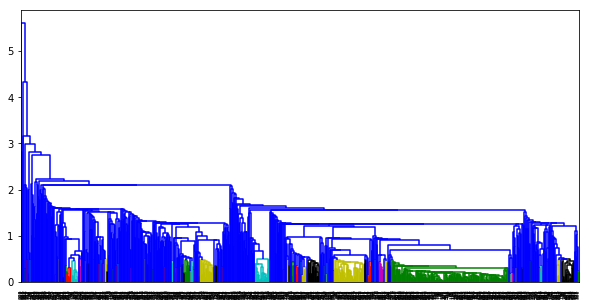

In [170]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [174]:
from sklearn import metrics

In [179]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(titanic_scaled)

metrics.adjusted_rand_score(y, kmeans.labels_)

0.61060086301085459

In [180]:
metrics.silhouette_score(X, kmeans.labels_)

0.18126070199109937

In [ ]:
metrics.adjusted_rand_score(y, kmeans.labels_)